In [3]:
import pandas as pd

In [ ]:
cell_type = 'K562'

In [7]:
id_to_gene_path = f'/home/pitikovegor/CourseWork/genomes/reds_experiments/{cell_type}/id_to_gene_gene.tsv'
dna_con_path = f'/home/pitikovegor/CourseWork/genomes/reds_experiments/{cell_type}/dna_clusters.bed'
rna_con_path = f'/home/pitikovegor/CourseWork/genomes/reds_experiments/{cell_type}/rna_clusters.bed'

In [5]:
dna_clus = pd.read_csv(dna_con_path, sep = '\t', header = None)
dna_clus.columns = ['dna_chr', 'dna_bgn', 'dna_end', 'id', 'cluster']

In [6]:
id_to_gene = pd.read_csv(id_to_gene_path, sep = '\t', header = None)
id_to_gene.columns = ['rna_chr', 'id', 'gene_bgn', 'gene_end', 'gene_name', 'gene_type', 'ac']

In [7]:
dna_clus = dna_clus.merge(id_to_gene, how='inner', on='id')

In [8]:
dna_clus['full_cluster'] = dna_clus['cluster'].astype(str) + ' ' + dna_clus['ac'] + ' ' + dna_clus['gene_name']

In [9]:
dna_clus

,dna_chr,dna_bgn,dna_end,id,cluster,rna_chr,gene_bgn,gene_end,gene_name,gene_type,ac,full_cluster
0,chr1,47161,49184,D00795:30:CA2UTANXX:1:1206:14086:96944,1,chr12,23529504,24562544,SOX5,protein_coding,ENSG00000134532.19,1 ENSG00000134532.19 SOX5
1,chr1,48252,50276,D00795:28:C99BVACXX:7:2211:12074:35932,1,chr7,30424527,30478784,NOD1,protein_coding,ENSG00000106100.11,1 ENSG00000106100.11 NOD1
2,chr1,48252,50276,D00795:30:CA2UTANXX:1:2209:3647:39884,1,chr19,48394875,48444931,GRIN2D,protein_coding,ENSG00000105464.3,1 ENSG00000105464.3 GRIN2D
3,chr1,48253,50276,D00795:28:C99BVACXX:8:2116:19500:54387,1,chr10,3066333,3137718,PFKP,protein_coding,ENSG00000067057.18,1 ENSG00000067057.18 PFKP
4,chr1,50891,52915,D00795:28:C99BVACXX:7:1313:8657:89330,2,chr19,16829398,16880353,SIN3B,protein_coding,ENSG00000127511.10,2 ENSG00000127511.10 SIN3B
...,...,...,...,...,...,...,...,...,...,...,...,...
37395733,chrY,56881643,56883666,D00795:28:C99BVACXX:7:1304:18102:84327,100688,chr16,81006498,81033114,CENPN,protein_coding,ENSG00000166451.13,100688 ENSG00000166451.13 CENPN
37395734,chrY,56881643,56883667,D00795:28:C99BVACXX:7:1305:9598:89457,100688,chr6,20401879,20493714,E2F3,protein_coding,ENSG00000112242.15,100688 ENSG00000112242.15 E2F3
37395735,chrY,56881643,56883667,D00795:28:C99BVACXX:7:2215:10214:67542,100688,chr22,49414524,49657542,C22orf34,lncRNA,ENSG00000188511.12,100688 ENSG00000188511.12 C22orf34
37395736,chrY,56882908,56884931,D00795:30:CA2UTANXX:5:2310:17295:38249,100688,chr2,85318020,85328296,TGOLN2,protein_coding,ENSG00000152291.14,100688 ENSG00000152291.14 TGOLN2


In [10]:
cluster_count = dna_clus.groupby(dna_clus['full_cluster']).size()

In [11]:
cluster_count = pd.DataFrame(cluster_count)

In [12]:
cluster_count = cluster_count.reset_index()

In [13]:
dna_clus = dna_clus.merge(cluster_count, how='inner', on='full_cluster')

In [14]:
del cluster_count

In [15]:
dna_clus

,dna_chr,dna_bgn,dna_end,id,cluster,rna_chr,gene_bgn,gene_end,gene_name,gene_type,ac,full_cluster,0
0,chr1,47161,49184,D00795:30:CA2UTANXX:1:1206:14086:96944,1,chr12,23529504,24562544,SOX5,protein_coding,ENSG00000134532.19,1 ENSG00000134532.19 SOX5,1
1,chr1,48252,50276,D00795:28:C99BVACXX:7:2211:12074:35932,1,chr7,30424527,30478784,NOD1,protein_coding,ENSG00000106100.11,1 ENSG00000106100.11 NOD1,1
2,chr1,48252,50276,D00795:30:CA2UTANXX:1:2209:3647:39884,1,chr19,48394875,48444931,GRIN2D,protein_coding,ENSG00000105464.3,1 ENSG00000105464.3 GRIN2D,1
3,chr1,48253,50276,D00795:28:C99BVACXX:8:2116:19500:54387,1,chr10,3066333,3137718,PFKP,protein_coding,ENSG00000067057.18,1 ENSG00000067057.18 PFKP,1
4,chr1,50891,52915,D00795:28:C99BVACXX:7:1313:8657:89330,2,chr19,16829398,16880353,SIN3B,protein_coding,ENSG00000127511.10,2 ENSG00000127511.10 SIN3B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37395733,chrY,56881643,56883666,D00795:28:C99BVACXX:7:1304:18102:84327,100688,chr16,81006498,81033114,CENPN,protein_coding,ENSG00000166451.13,100688 ENSG00000166451.13 CENPN,1
37395734,chrY,56881643,56883667,D00795:28:C99BVACXX:7:1305:9598:89457,100688,chr6,20401879,20493714,E2F3,protein_coding,ENSG00000112242.15,100688 ENSG00000112242.15 E2F3,1
37395735,chrY,56881643,56883667,D00795:28:C99BVACXX:7:2215:10214:67542,100688,chr22,49414524,49657542,C22orf34,lncRNA,ENSG00000188511.12,100688 ENSG00000188511.12 C22orf34,1
37395736,chrY,56882908,56884931,D00795:30:CA2UTANXX:5:2310:17295:38249,100688,chr2,85318020,85328296,TGOLN2,protein_coding,ENSG00000152291.14,100688 ENSG00000152291.14 TGOLN2,1


In [16]:
rna_clus = pd.read_csv(rna_con_path, sep = '\t', header = None)
#rna_clus.columns = ['chr_rna', 'rna_start', 'rna_end', 'id', 'cluster']

In [17]:
rna_clus

,0,1,2,3,4,5,6
0,chr1,97547,99620,D00795:30:CA2UTANXX:1:1213:17082:84239,NaN,+,1
1,chr1,136728,138851,D00795:30:CA2UTANXX:1:2309:5734:13759,NaN,+,2
2,chr1,136729,138818,D00795:28:C99BVACXX:8:2316:13715:3572,NaN,+,2
3,chr1,136733,138836,D00795:28:C99BVACXX:7:1114:17671:79160,NaN,+,2
4,chr1,136747,138860,D00795:30:CA2UTANXX:1:2302:8689:9823,NaN,+,2
...,...,...,...,...,...,...,...
41505560,chrY,26396960,26399032,D00795:30:CA2UTANXX:1:2210:2634:59652,NaN,-,232034
41505561,chrY,26609359,26611391,D00795:28:C99BVACXX:7:2309:5290:63805,NaN,-,232035
41505562,chrY,26640195,26642226,D00795:28:C99BVACXX:7:1311:3467:76057,NaN,-,232036
41505563,chrY,56834029,56836054,D00795:28:C99BVACXX:7:1214:9018:12501,NaN,-,232037


In [18]:
rna_clus.columns = ['rna_chr', 'rna_bgn', 'rna_end', 'id', 'score', 'rna_strand', 'cluster']

In [19]:
rna_clus = rna_clus.merge(id_to_gene, how='inner', on='id')

In [20]:
rna_clus['full_cluster'] = rna_clus['cluster'].astype(str) + ' ' + rna_clus['ac'] + ' ' + rna_clus['gene_name']

In [21]:
cluster_count = rna_clus.groupby(rna_clus['full_cluster']).size()
cluster_count = pd.DataFrame(cluster_count)
cluster_count = cluster_count.reset_index()
rna_clus = rna_clus.merge(cluster_count, how='inner', on='full_cluster')

In [22]:
del cluster_count
del id_to_gene

In [23]:
rna_clus

,rna_chr_x,rna_bgn,rna_end,id,score,rna_strand,cluster,rna_chr_y,gene_bgn,gene_end,gene_name,gene_type,ac,full_cluster,0
0,chr1,628818,630950,D00795:30:CA2UTANXX:1:2304:7172:66617,NaN,+,8,chr1,629640,630683,MTND2P28,unprocessed_pseudogene,ENSG00000225630.1,8 ENSG00000225630.1 MTND2P28,123
1,chr1,628830,630943,D00795:30:CA2UTANXX:5:2216:21181:90912,NaN,+,8,chr1,629640,630683,MTND2P28,unprocessed_pseudogene,ENSG00000225630.1,8 ENSG00000225630.1 MTND2P28,123
2,chr1,628842,630950,D00795:30:CA2UTANXX:1:1206:8595:74083,NaN,+,8,chr1,629640,630683,MTND2P28,unprocessed_pseudogene,ENSG00000225630.1,8 ENSG00000225630.1 MTND2P28,123
3,chr1,628851,630950,D00795:30:CA2UTANXX:1:1116:5920:17108,NaN,+,8,chr1,629640,630683,MTND2P28,unprocessed_pseudogene,ENSG00000225630.1,8 ENSG00000225630.1 MTND2P28,123
4,chr1,628854,630942,D00795:30:CA2UTANXX:1:2302:10573:61661,NaN,+,8,chr1,629640,630683,MTND2P28,unprocessed_pseudogene,ENSG00000225630.1,8 ENSG00000225630.1 MTND2P28,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37395733,chrY,26329722,26331750,D00795:30:CA2UTANXX:1:1214:7740:9211,NaN,-,232026,chrY,26277923,26354418,PPP1R12BP1,unprocessed_pseudogene,ENSG00000229238.3,232026 ENSG00000229238.3 PPP1R12BP1,1
37395734,chrY,26332067,26334747,D00795:28:C99BVACXX:8:1215:8095:15405,NaN,-,232027,chrY,26277923,26354418,PPP1R12BP1,unprocessed_pseudogene,ENSG00000229238.3,232027 ENSG00000229238.3 PPP1R12BP1,1
37395735,chrY,26340113,26342181,D00795:30:CA2UTANXX:1:1101:5430:57899,NaN,-,232028,chrY,26277923,26354418,PPP1R12BP1,unprocessed_pseudogene,ENSG00000229238.3,232028 ENSG00000229238.3 PPP1R12BP1,2
37395736,chrY,26340138,26342181,D00795:30:CA2UTANXX:1:1202:8416:37595,NaN,-,232028,chrY,26277923,26354418,PPP1R12BP1,unprocessed_pseudogene,ENSG00000229238.3,232028 ENSG00000229238.3 PPP1R12BP1,2


In [24]:
rna_clus.rename(columns={0: 'clus_count_rna'}, inplace = True)
dna_clus.rename(columns={0: 'clus_count_dna'}, inplace = True)

In [25]:
rna_clus.rename(columns={'rna_chr_x': 'rna_chr'}, inplace = True)

In [27]:
contacts = pd.merge(left = rna_clus[['rna_chr', 'rna_bgn', 'rna_end',  'rna_strand', 'id', 'gene_bgn', 'gene_end', 'gene_name', 'gene_type', 'ac', 'clus_count_rna']], right = dna_clus[['dna_chr', 'dna_bgn', 'dna_end', 'id', 'rna_chr', 'gene_bgn', 'gene_end', 'gene_name', 'gene_type', 'ac', 'clus_count_dna']], left_on=['id', 'rna_chr', 'gene_bgn', 'gene_end', 'gene_name', 'gene_type', 'ac'], right_on=['id', 'rna_chr', 'gene_bgn', 'gene_end', 'gene_name', 'gene_type', 'ac'], how ='inner')

In [28]:
contacts

,rna_chr,rna_bgn,rna_end,rna_strand,id,gene_bgn,gene_end,gene_name,gene_type,ac,clus_count_rna,dna_chr,dna_bgn,dna_end,clus_count_dna
0,chr1,628818,630950,+,D00795:30:CA2UTANXX:1:2304:7172:66617,629640,630683,MTND2P28,unprocessed_pseudogene,ENSG00000225630.1,123,chr4,20810245,20812268,1
1,chr1,628830,630943,+,D00795:30:CA2UTANXX:5:2216:21181:90912,629640,630683,MTND2P28,unprocessed_pseudogene,ENSG00000225630.1,123,chr11,42890629,42892652,1
2,chr1,628842,630950,+,D00795:30:CA2UTANXX:1:1206:8595:74083,629640,630683,MTND2P28,unprocessed_pseudogene,ENSG00000225630.1,123,chr4,24389491,24391515,1
3,chr1,628851,630950,+,D00795:30:CA2UTANXX:1:1116:5920:17108,629640,630683,MTND2P28,unprocessed_pseudogene,ENSG00000225630.1,123,chr7,6465803,6467827,1
4,chr1,628854,630942,+,D00795:30:CA2UTANXX:1:2302:10573:61661,629640,630683,MTND2P28,unprocessed_pseudogene,ENSG00000225630.1,123,chr5,100947375,100949398,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37395733,chrY,26329722,26331750,-,D00795:30:CA2UTANXX:1:1214:7740:9211,26277923,26354418,PPP1R12BP1,unprocessed_pseudogene,ENSG00000229238.3,1,chr15,68051176,68053200,1
37395734,chrY,26332067,26334747,-,D00795:28:C99BVACXX:8:1215:8095:15405,26277923,26354418,PPP1R12BP1,unprocessed_pseudogene,ENSG00000229238.3,1,chr6,122725717,122727740,1
37395735,chrY,26340113,26342181,-,D00795:30:CA2UTANXX:1:1101:5430:57899,26277923,26354418,PPP1R12BP1,unprocessed_pseudogene,ENSG00000229238.3,2,chr1,9820571,9822595,1
37395736,chrY,26340138,26342181,-,D00795:30:CA2UTANXX:1:1202:8416:37595,26277923,26354418,PPP1R12BP1,unprocessed_pseudogene,ENSG00000229238.3,2,chr8,96756064,96758088,1


In [29]:
del rna_clus
del dna_clus

In [30]:
norm_data_path = f'/home/pitikovegor/CourseWork/genomes/normalisation_data/{cell_type}.pvalue.tab.txt'

In [31]:
normalized = pd.read_csv(norm_data_path, sep = '\t')

In [32]:
normalized

,gene_name_un,gene_chr,gene_start,gene_end,gene_strand,ensg,gene_type,gene_name,contacts_count,rnaseq_count,cont,rnaseq,chP,zscore,pval
0,1_GM12878,chr10,65686345,65891940,-,no,vlinc,1_GM12878,45,5,1.218109e-06,1.403004e-07,2.161269,1.701925,0.088769
1,1000_H1-Esc,chr10,65610536,65727266,+,no,vlinc,1000_H1-Esc,5209,1473,1.379641e-04,3.446714e-05,1.386987,1.002246,0.316225
2,1002_H1-Esc,chr12,67321856,67381858,+,no,vlinc,1002_H1-Esc,347,85,9.215261e-06,2.010973e-06,1.522242,1.124469,0.260814
3,1004_H1-Esc,chrX,75635037,75694676,+,no,vlinc,1004_H1-Esc,161,66,4.289863e-06,1.566688e-06,1.007291,0.659134,0.509810
4,1010_H1-Esc,chrX,81299107,81374646,+,no,vlinc,1010_H1-Esc,24,22,6.620159e-07,5.378183e-07,0.207769,-0.063353,0.949486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26598,ZYG11A,chr1,52842511,52894998,+,ENSG00000203995.10,protein_coding,ZYG11A,7511,2400,1.989225e-04,5.614355e-05,1.265004,0.892016,0.372384
26599,ZYG11B,chr1,52726453,52827336,+,ENSG00000162378.13,protein_coding,ZYG11B,2497,2130,6.614863e-05,4.983003e-05,0.283286,0.004888,0.996100
26600,ZYX,chr7,143381295,143391111,+,ENSG00000159840.16,protein_coding,ZYX,902,314,2.391201e-05,7.365772e-06,1.177537,0.812977,0.416231
26601,ZZEF1,chr17,4004445,4143030,-,ENSG00000074755.15,protein_coding,ZZEF1,4553,3343,1.205928e-04,7.819410e-05,0.433225,0.140381,0.888359


In [33]:
contacts = pd.merge(left=normalized[['contacts_count', 'rnaseq_count', 'cont', 'rnaseq', 'chP', 'zscore', 'pval', 'gene_name', 'ensg']], right=contacts, left_on=['gene_name', 'ensg'], right_on=['gene_name', 'ac'], how ='inner')

In [34]:
contacts

,contacts_count,rnaseq_count,cont,rnaseq,chP,zscore,pval,gene_name,ensg,rna_chr,...,id,gene_bgn,gene_end,gene_type,ac,clus_count_rna,dna_chr,dna_bgn,dna_end,clus_count_dna
0,5,94,1.588838e-07,0.000002,-2.637730,-2.634684,0.008422,A1BG,ENSG00000121410.12,chr19,...,D00795:28:C99BVACXX:7:1115:3795:65105,58345178,58353492,protein_coding,ENSG00000121410.12,11,chr9,96513328,96515352,1
1,5,94,1.588838e-07,0.000002,-2.637730,-2.634684,0.008422,A1BG,ENSG00000121410.12,chr19,...,D00795:28:C99BVACXX:7:1311:6744:54673,58345178,58353492,protein_coding,ENSG00000121410.12,11,chr2,85581894,85583916,1
2,5,94,1.588838e-07,0.000002,-2.637730,-2.634684,0.008422,A1BG,ENSG00000121410.12,chr19,...,D00795:30:CA2UTANXX:1:2308:3426:77358,58345178,58353492,protein_coding,ENSG00000121410.12,11,chr1,164236210,164238234,1
3,5,94,1.588838e-07,0.000002,-2.637730,-2.634684,0.008422,A1BG,ENSG00000121410.12,chr19,...,D00795:30:CA2UTANXX:5:2311:18668:59502,58345178,58353492,protein_coding,ENSG00000121410.12,11,chr15,99989020,99991043,1
4,5,94,1.588838e-07,0.000002,-2.637730,-2.634684,0.008422,A1BG,ENSG00000121410.12,chr19,...,D00795:28:C99BVACXX:8:1105:20169:24453,58345178,58353492,protein_coding,ENSG00000121410.12,11,chr3,61449033,61451057,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34026444,13957,3629,3.696167e-04,0.000085,1.471207,1.078352,0.280877,ZZZ3,ENSG00000036549.13,chr1,...,D00795:30:CA2UTANXX:1:2109:11055:59991,77562416,77683419,protein_coding,ENSG00000036549.13,13167,chr15,56789154,56791177,2
34026445,13957,3629,3.696167e-04,0.000085,1.471207,1.078352,0.280877,ZZZ3,ENSG00000036549.13,chr1,...,D00795:30:CA2UTANXX:1:1109:13519:47225,77562416,77683419,protein_coding,ENSG00000036549.13,13167,chr1,184860952,184862976,3
34026446,13957,3629,3.696167e-04,0.000085,1.471207,1.078352,0.280877,ZZZ3,ENSG00000036549.13,chr1,...,D00795:30:CA2UTANXX:1:1206:4723:5787,77562416,77683419,protein_coding,ENSG00000036549.13,13167,chr4,46739386,46741410,1
34026447,13957,3629,3.696167e-04,0.000085,1.471207,1.078352,0.280877,ZZZ3,ENSG00000036549.13,chr1,...,D00795:30:CA2UTANXX:5:2105:8876:52015,77562416,77683419,protein_coding,ENSG00000036549.13,13167,chr1,62585489,62587513,2


In [8]:
save_path = f'/home/pitikovegor/CourseWork/genomes/reds_experiments/{cell_type}/all_parsed'

In [36]:
contacts.to_csv(f'{save_path}/all_table.tsv', sep = '\t', index = False)

In [4]:
chr_names=['chrX', 'chrY']
for i in range(1, 23):
    chr_names.append('chr%d' % (i))

In [9]:
for i in chr_names:
    contacts[contacts['rna_chr']==i].to_csv(f'{save_path}/{i}_all_table.tsv', sep = '\t', index = False)
    print(f'All for {i}')

All for chrX
All for chrY
All for chr1
All for chr2
All for chr3
All for chr4
All for chr5
All for chr6
All for chr7
All for chr8
All for chr9
All for chr10
All for chr11
All for chr12
All for chr13
All for chr14
All for chr15
All for chr16
All for chr17
All for chr18
All for chr19
All for chr20
All for chr21
All for chr22


In [4]:
contacts = pd.read_csv('/home/pitikovegor/CourseWork/genomes/reds_experiments/K562/all_parsed/all_table.tsv', sep = '\t')

In [52]:
contacts[(contacts['clus_count_rna'] > 10) &
        (contacts['clus_count_dna'] > 10) & 
        (contacts['chr_rna'] != contacts['chr_dna']) & 
        (contacts['gene_type'] != 'protein_coding')]

,contacts_count,rnaseq_count,cont,rnaseq,chP,zscore,pval,gene_name,ensg,chr_rna,...,id,gene_bgn,gene_end,gene_type,ac,clus_count_rna,chr_dna,dna_start,dna_end,clus_count_dna
190479,61006,18982,0.001616,0.000444,1.291832,0.916259,0.359531,AC004936.1,ENSG00000287409.1,chr7,...,D00795:28:C99BVACXX:7:1215:15533:47860,9981516,10085494,lncRNA,ENSG00000287409.1,59270,chr1,230919859,230921883,16
190532,61006,18982,0.001616,0.000444,1.291832,0.916259,0.359531,AC004936.1,ENSG00000287409.1,chr7,...,D00795:30:CA2UTANXX:1:2314:20647:75474,9981516,10085494,lncRNA,ENSG00000287409.1,59270,chr21,34749126,34751150,13
190625,61006,18982,0.001616,0.000444,1.291832,0.916259,0.359531,AC004936.1,ENSG00000287409.1,chr7,...,D00795:28:C99BVACXX:7:2212:14493:11668,9981516,10085494,lncRNA,ENSG00000287409.1,59270,chr6,139830416,139832439,16
190660,61006,18982,0.001616,0.000444,1.291832,0.916259,0.359531,AC004936.1,ENSG00000287409.1,chr7,...,D00795:30:CA2UTANXX:1:1113:7470:35344,9981516,10085494,lncRNA,ENSG00000287409.1,59270,chr9,132977007,132979031,12
190701,61006,18982,0.001616,0.000444,1.291832,0.916259,0.359531,AC004936.1,ENSG00000287409.1,chr7,...,D00795:30:CA2UTANXX:5:1302:11468:35070,9981516,10085494,lncRNA,ENSG00000287409.1,59270,chr13,91185325,91187348,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33122073,11152,2896,0.000295,0.000068,1.472420,1.079447,0.280388,ZFAS1,ENSG00000177410.13,chr20,...,D00795:30:CA2UTANXX:1:2101:4087:59112,49278178,49299600,lncRNA,ENSG00000177410.13,25968,chr9,130769005,130771029,18
33122686,11152,2896,0.000295,0.000068,1.472420,1.079447,0.280388,ZFAS1,ENSG00000177410.13,chr20,...,M01460:89:000000000-AJJ2J:1:1115:10148:20496,49278178,49299600,lncRNA,ENSG00000177410.13,25968,chr9,131141850,131143874,15
33122766,11152,2896,0.000295,0.000068,1.472420,1.079447,0.280388,ZFAS1,ENSG00000177410.13,chr20,...,D00795:30:CA2UTANXX:1:2214:10379:62283,49278178,49299600,lncRNA,ENSG00000177410.13,25968,chr22,19786061,19788085,12
33123005,11152,2896,0.000295,0.000068,1.472420,1.079447,0.280388,ZFAS1,ENSG00000177410.13,chr20,...,D00795:30:CA2UTANXX:5:2216:5122:23350,49278178,49299600,lncRNA,ENSG00000177410.13,25968,chr22,19870375,19872399,12


In [8]:
s = set(contacts[(contacts['clus_count_rna'] > 10) &
        (contacts['clus_count_dna'] > 10) & 
        (contacts['chr_rna'] != contacts['chr_dna']) & 
        (contacts['gene_type'] != 'protein_coding')]['gene_name'])
s

{'AC004936.1',
 'AC005208.1',
 'AC008825.1',
 'AC012494.1',
 'AC020687.1',
 'AC069277.1',
 'AC073365.1',
 'AC079466.1',
 'AC087235.1',
 'AC091987.1',
 'AC093515.1',
 'AC097528.1',
 'AC099520.1',
 'AC100849.1',
 'AC106744.1',
 'AC110614.1',
 'AC129926.2',
 'AC242426.2',
 'AF279873.3',
 'AL021155.4',
 'AL110292.1',
 'AL117329.1',
 'AL355075.4',
 'AL359436.1',
 'AL390334.1',
 'AL445255.1',
 'AL713998.1',
 'AP000561.1',
 'B3GALT1-AS1',
 'C22orf34',
 'CCDC26',
 'DLEU1',
 'DSCR4',
 'FP236383.3',
 'FTX',
 'GAS5',
 'LINC00355',
 'LINC00470',
 'LINC00534',
 'LINC01033',
 'LINC01036',
 'LINC01169',
 'LINC01194',
 'LINC02055',
 'LINC02109',
 'LINC02163',
 'LINC02315',
 'LINC02476',
 'LINC02506',
 'MALAT1',
 'MIR17HG',
 'MIR3681HG',
 'MIR548XHG',
 'MIR924HG',
 'NEAT1',
 'PURPL',
 'PVT1',
 'RN7SK',
 'RNU12',
 'RNU2-2P',
 'RNU5E-1',
 'RPPH1',
 'SNHG1',
 'SNHG29',
 'SNHG3',
 'SNHG5',
 'SNORA73B',
 'TPTEP1',
 'VENTXP1',
 'Z93241.1',
 'ZFAS1'}

In [44]:
contacts[(contacts['clus_count_rna'] > 99) &
        (contacts['clus_count_dna'] > 99) & 
        (contacts['chr_rna'] != contacts['chr_dna'])]

,contacts_count,rnaseq_count,cont,rnaseq,chP,zscore,pval,gene_name,ensg,chr_rna,...,id,gene_bgn,gene_end,gene_type,ac,clus_count_rna,chr_dna,dna_start,dna_end,clus_count_dna
88068,46029,9626,0.001219,0.000225,1.689109,1.275258,0.202218,ABL1,ENSG00000097007.19,chr9,...,D00795:30:CA2UTANXX:5:2303:9340:48649,130713016,130887675,protein_coding,ENSG00000097007.19,43607,chr13,93313055,93315079,127
88174,46029,9626,0.001219,0.000225,1.689109,1.275258,0.202218,ABL1,ENSG00000097007.19,chr9,...,D00795:28:C99BVACXX:8:1315:2242:100848,130713016,130887675,protein_coding,ENSG00000097007.19,43607,chr22,22844498,22846521,242
88175,46029,9626,0.001219,0.000225,1.689109,1.275258,0.202218,ABL1,ENSG00000097007.19,chr9,...,D00795:30:CA2UTANXX:1:2307:5212:96217,130713016,130887675,protein_coding,ENSG00000097007.19,43607,chr22,23180797,23182821,702
88190,46029,9626,0.001219,0.000225,1.689109,1.275258,0.202218,ABL1,ENSG00000097007.19,chr9,...,D00795:30:CA2UTANXX:5:2103:8795:61455,130713016,130887675,protein_coding,ENSG00000097007.19,43607,chr22,23158684,23160708,702
88204,46029,9626,0.001219,0.000225,1.689109,1.275258,0.202218,ABL1,ENSG00000097007.19,chr9,...,D00795:28:C99BVACXX:8:1208:7375:12335,130713016,130887675,protein_coding,ENSG00000097007.19,43607,chr22,23090755,23092779,702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20611078,41460,20852,0.001098,0.000488,0.811643,0.482337,0.629567,NUP214,ENSG00000126883.17,chr9,...,D00795:28:C99BVACXX:7:2207:14580:94531,131125586,131234663,protein_coding,ENSG00000126883.17,39082,chr13,90398681,90400705,111
20611083,41460,20852,0.001098,0.000488,0.811643,0.482337,0.629567,NUP214,ENSG00000126883.17,chr9,...,D00795:30:CA2UTANXX:1:1110:6908:37304,131125586,131234663,protein_coding,ENSG00000126883.17,39082,chr22,23124477,23126500,277
20611109,41460,20852,0.001098,0.000488,0.811643,0.482337,0.629567,NUP214,ENSG00000126883.17,chr9,...,D00795:30:CA2UTANXX:1:2204:5518:83294,131125586,131234663,protein_coding,ENSG00000126883.17,39082,chr13,91309325,91311348,322
20611142,41460,20852,0.001098,0.000488,0.811643,0.482337,0.629567,NUP214,ENSG00000126883.17,chr9,...,D00795:30:CA2UTANXX:5:1304:11155:10708,131125586,131234663,protein_coding,ENSG00000126883.17,39082,chr13,93315670,93317693,227


In [49]:
set(contacts[(contacts['clus_count_rna'] > 99) &
        (contacts['clus_count_dna'] > 99) & 
        (contacts['chr_rna'] != contacts['chr_dna']) & 
        (contacts['gene_type'] == 'protein_coding')]['gene_name'])

{'ABL1', 'BCR', 'GPC5', 'GSE1', 'IMMP2L', 'NUP214'}

In [6]:
a = set(contacts[(contacts['clus_count_rna'] > 10) &
        (contacts['clus_count_dna'] > 10) & 
        (contacts['chr_rna'] != contacts['chr_dna']) & 
        (contacts['gene_type'] == 'protein_coding')]['gene_name'])
a

{'ABL1',
 'AC008695.1',
 'AC069288.1',
 'AC093423.3',
 'AC104389.5',
 'ACBD6',
 'ADGRV1',
 'AFDN',
 'AGAP1',
 'AMBRA1',
 'AMOTL1',
 'ANKRD11',
 'ANKRD17',
 'ANKRD28',
 'ARHGAP24',
 'ARID1A',
 'ARID1B',
 'ARL15',
 'ASAP1',
 'ASCC3',
 'BACH1',
 'BCAT1',
 'BCR',
 'BIRC6',
 'BTBD9',
 'CALN1',
 'CAMKMT',
 'CARD18',
 'CBFA2T3',
 'CCDC91',
 'CCNY',
 'CD2AP',
 'CDC42BPA',
 'CDC45',
 'CDH12',
 'CDK5RAP2',
 'CDKAL1',
 'CDYL',
 'CECR2',
 'CELF1',
 'CELF2',
 'CENPP',
 'CHCHD3',
 'CHD9',
 'CHST11',
 'CLTCL1',
 'CMIP',
 'CMSS1',
 'COA1',
 'COP1',
 'CPED1',
 'CRADD',
 'CRKL',
 'CTBP2',
 'DCAF6',
 'DDX10',
 'DENND1A',
 'DGCR2',
 'DGCR8',
 'DIAPH1',
 'DIAPH3',
 'DNAH14',
 'DNAJC1',
 'DNAJC6',
 'DOCK8',
 'DPY30',
 'DTNA',
 'DYRK1A',
 'DYSF',
 'E2F3',
 'EIF3H',
 'EPS15',
 'ERC1',
 'ETNK1',
 'EXOC4',
 'FAF1',
 'FAM126B',
 'FAM13A',
 'FAM155A',
 'FAM78A',
 'FARS2',
 'FHIT',
 'FMNL2',
 'FNDC3B',
 'FTO',
 'FUT8',
 'GAB2',
 'GABRG3',
 'GALNT2',
 'GATAD2A',
 'GMDS',
 'GNAQ',
 'GNB1L',
 'GNGT1',
 'GPC5',
 'GPC6

In [1]:
import pandas as pd

In [2]:
contacts = pd.read_csv('/home/pitikovegor/CourseWork/genomes/reds_experiments/K562/all_parsed/all_table.tsv', sep = '\t')

In [15]:
import scipy.stats as st
import json
def get_dist(data, filename):
    dist_names = ["norm", "gamma", "expon", "lognorm"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)
        params[dist_name] = param
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    with open(filename, 'w') as file:
        file.write(f'{json.dumps(params)}\n')
    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]


In [3]:
contacts

,contacts_count,rnaseq_count,cont,rnaseq,chP,zscore,pval,gene_name,ensg,rna_chr,...,id,gene_bgn,gene_end,gene_type,ac,clus_count_rna,dna_chr,dna_bgn,dna_end,clus_count_dna
0,5,94,1.588838e-07,0.000002,-2.637730,-2.634684,0.008422,A1BG,ENSG00000121410.12,chr19,...,D00795:28:C99BVACXX:7:1115:3795:65105,58345178,58353492,protein_coding,ENSG00000121410.12,11,chr9,96513328,96515352,1
1,5,94,1.588838e-07,0.000002,-2.637730,-2.634684,0.008422,A1BG,ENSG00000121410.12,chr19,...,D00795:28:C99BVACXX:7:1311:6744:54673,58345178,58353492,protein_coding,ENSG00000121410.12,11,chr2,85581894,85583916,1
2,5,94,1.588838e-07,0.000002,-2.637730,-2.634684,0.008422,A1BG,ENSG00000121410.12,chr19,...,D00795:30:CA2UTANXX:1:2308:3426:77358,58345178,58353492,protein_coding,ENSG00000121410.12,11,chr1,164236210,164238234,1
3,5,94,1.588838e-07,0.000002,-2.637730,-2.634684,0.008422,A1BG,ENSG00000121410.12,chr19,...,D00795:30:CA2UTANXX:5:2311:18668:59502,58345178,58353492,protein_coding,ENSG00000121410.12,11,chr15,99989020,99991043,1
4,5,94,1.588838e-07,0.000002,-2.637730,-2.634684,0.008422,A1BG,ENSG00000121410.12,chr19,...,D00795:28:C99BVACXX:8:1105:20169:24453,58345178,58353492,protein_coding,ENSG00000121410.12,11,chr3,61449033,61451057,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34026444,13957,3629,3.696167e-04,0.000085,1.471207,1.078352,0.280877,ZZZ3,ENSG00000036549.13,chr1,...,D00795:30:CA2UTANXX:1:2109:11055:59991,77562416,77683419,protein_coding,ENSG00000036549.13,13167,chr15,56789154,56791177,2
34026445,13957,3629,3.696167e-04,0.000085,1.471207,1.078352,0.280877,ZZZ3,ENSG00000036549.13,chr1,...,D00795:30:CA2UTANXX:1:1109:13519:47225,77562416,77683419,protein_coding,ENSG00000036549.13,13167,chr1,184860952,184862976,3
34026446,13957,3629,3.696167e-04,0.000085,1.471207,1.078352,0.280877,ZZZ3,ENSG00000036549.13,chr1,...,D00795:30:CA2UTANXX:1:1206:4723:5787,77562416,77683419,protein_coding,ENSG00000036549.13,13167,chr4,46739386,46741410,1
34026447,13957,3629,3.696167e-04,0.000085,1.471207,1.078352,0.280877,ZZZ3,ENSG00000036549.13,chr1,...,D00795:30:CA2UTANXX:5:2105:8876:52015,77562416,77683419,protein_coding,ENSG00000036549.13,13167,chr1,62585489,62587513,2


In [4]:
gene_count = contacts.groupby(contacts['gene_name']).size()

In [5]:
gene_count = pd.DataFrame(gene_count)
gene_count.reset_index()

,gene_name,0
0,A1BG,15
1,A1BG-AS1,143
2,A1CF,2
3,A2M-AS1,8
4,A2ML1,4
...,...,...
23397,ZYG11A,7107
23398,ZYG11B,2327
23399,ZYX,871
23400,ZZEF1,4207


In [6]:
contacts = contacts.merge(gene_count, how='inner', on='gene_name')

In [8]:
contacts['dna_cl_norm'] = contacts['clus_count_dna'] / contacts[0]

In [9]:
contacts['cpr'] = contacts[0] / contacts['rnaseq_count']
contacts['cpr_nastya'] = contacts['contacts_count'] / contacts['rnaseq_count']

In [ ]:
get_dist(contacts['dna_cl_norm'], '/home/pitikovegor/CourseWork/genomes/reds_experiments/K562/all_parsed/normed_dna.json')
get_dist(contacts['clus_count_dna'], '/home/pitikovegor/CourseWork/genomes/reds_experiments/K562/all_parsed/dna.json')
get_dist(contacts['clus_count_rna'], '/home/pitikovegor/CourseWork/genomes/reds_experiments/K562/all_parsed/rna.json')
get_dist(contacts['cpr'], '/home/pitikovegor/CourseWork/genomes/reds_experiments/K562/all_parsed/cpr.json')
get_dist(contacts['cpr_nastya'], '/home/pitikovegor/CourseWork/genomes/reds_experiments/K562/all_parsed/cpr_nastya.json')

In [11]:
import json

In [14]:
with open('/home/pitikovegor/CourseWork/genomes/reds_experiments/K562/all_parsed/rna.json') as f:
    rnaclusnn = json.load(f)
with open('/home/pitikovegor/CourseWork/genomes/reds_experiments/K562/all_parsed/dna.json') as f:
    dnaclusnn = json.load(f)
with open('/home/pitikovegor/CourseWork/genomes/reds_experiments/K562/all_parsed/normed_dna.json') as f:
    dnaclusnorm = json.load(f)
with open('/home/pitikovegor/CourseWork/genomes/reds_experiments/K562/all_parsed/cpr.json') as f:
    allcon = json.load(f)

In [ ]:
D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))

In [22]:
import scipy.stats as st
def count_p_dist(data, params):
    dist_names = ["norm", "gamma", "expon", "lognorm"]
    for dist_name in params.keys():
        D, p = st.kstest(data, dist_name, args=params[dist_name])
        print(f"for {dist_name} pval is {p} and criterium is {D} ")

In [23]:
count_p_dist(contacts['dna_cl_norm'], dnaclusnorm)

for norm pval is 0.0 and criterium is 0.4685597289918135 
for gamma pval is 0.0 and criterium is 0.968570488704524 
for expon pval is 0.0 and criterium is 0.3354098917398985 
for lognorm pval is 0.0 and criterium is 0.03015027215737931 


In [24]:
count_p_dist(contacts['clus_count_dna'], dnaclusnn)

for norm pval is 0.0 and criterium is 0.422491488685936 
for gamma pval is 0.0 and criterium is 0.5630760403231292 
for expon pval is 0.0 and criterium is 0.6496886289838825 
for lognorm pval is 0.0 and criterium is 0.6491278454560456 


In [25]:
count_p_dist(contacts['clus_count_rna'], rnaclusnn)

for norm pval is 0.0 and criterium is 0.383791589663633 
for gamma pval is 0.0 and criterium is 0.20366250800352714 
for expon pval is 0.0 and criterium is 0.3746692650906266 
for lognorm pval is 0.0 and criterium is 0.04216582163302096 


In [26]:
count_p_dist(contacts['cpr'], allcon)

for norm pval is 0.0 and criterium is 0.4717063280669472 
for gamma pval is 0.0 and criterium is 0.9895558523737458 
for expon pval is 0.0 and criterium is 0.4852706120690284 
for lognorm pval is 0.0 and criterium is 0.08224453419740418 


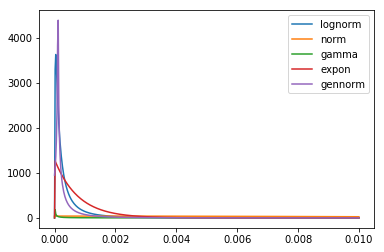

In [42]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 0.01, 500)
plt.plot(x, st.lognorm.pdf(x, *params['lognorm']))
plt.plot(x, st.norm.pdf(x, *params['norm']))
plt.plot(x, st.gamma.pdf(x, *params['gamma']))
plt.plot(x, st.expon.pdf(x, *params['expon']))
plt.plot(x, st.gennorm.pdf(x, *params['gennorm']))
plt.legend(['lognorm', 'norm', 'gamma', 'expon', 'gennorm'])
plt.show()

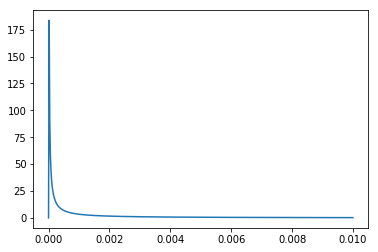

In [46]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 0.01, 500)

plt.plot(x, st.gamma.pdf(x, *params['gamma']))

plt.show()

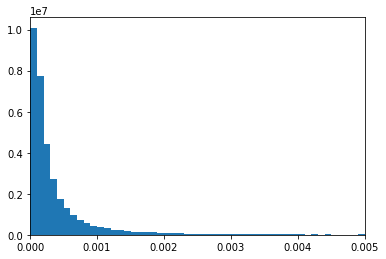

In [45]:
plt.hist(contacts['dna_cl_norm'], bins = 10000)
plt.xlim(0, 0.005)
#plt.ylim(0, 1)
plt.show()


In [28]:
import pandas as pd
import ray
from multiprocessing import Process, Pipe
import xgboost as xgb
import numpy as np 
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier, GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
import tensorflow
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
import matplotlib.gridspec as gridspec
from kpal.klib import Profile
from multiprocessing import Queue
from multiprocessing import Process
from Bio.Seq import Seq
from Bio import SeqIO
from multiprocessing import Pool, freeze_support

/home/pitikovegor/anaconda/anaconda/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/pitikovegor/anaconda/anaconda/lib/python3.7/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/pitikovegor/anaconda/anaconda/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/home/pitikovegor/anaconda/anaconda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future ve

In [44]:
max(contacts['clus_count_dna'])

702

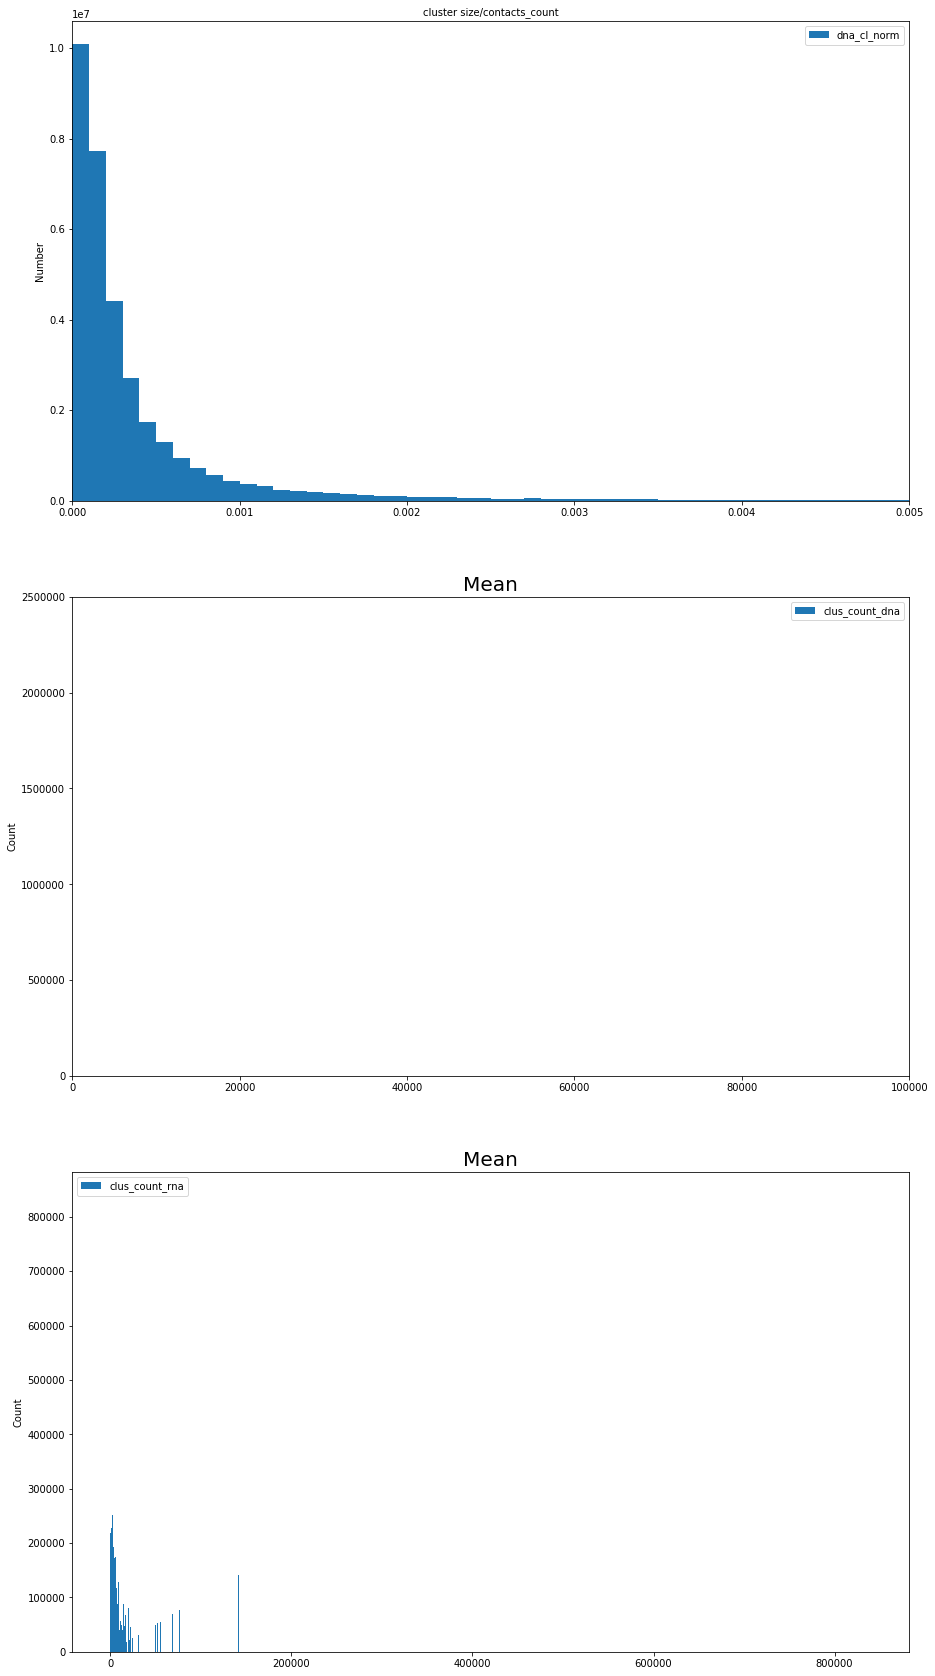

In [39]:
plt.rcParams['axes.titlesize'] = 8
fig = plt.figure(1, figsize=(15, 30))
gs = gridspec.GridSpec(3, 1)
ax0 = fig.add_subplot(gs[0, :])
dna_cl_norm = ax0.hist(contacts['dna_cl_norm'], bins = 10000)
ax0.set_ylabel('Number')
ax0.set_title('cluster size/contacts_count', fontsize=10)
ax0.set_xlim(0, 0.005)
#ax0.set_aspect('equal', adjustable='box')
ax0.legend()
ax1 = fig.add_subplot(gs[1, :])
aaa = ax1.hist(contacts['clus_count_dna'], bins = 10000)
ax1.set_ylabel('Count')
ax1.set_title('Mean', fontsize=20)
#ax1.set_xlim(0, 100)
#ax1.set_ylim(0, 0.5*10**7)
ax1.legend()
ax2 = fig.add_subplot(gs[2, :])
nonspec = ax2.hist(contacts['clus_count_rna'], bins = 10000)
ax2.set_ylabel('Count')
ax2.set_title('Mean', fontsize=20)
ax1.set_xlim(0, 100000)
ax1.set_ylim(0, 0.25*10**7)
#ax2.set_xticks(np.arange(len(means.keys())))
#ax2.set_xticklabels(means.keys(), rotation=45,  ha="right", position=(0, 0))
#ax2.set_aspect('equal', adjustable='box')
ax2.legend()
plt.show()




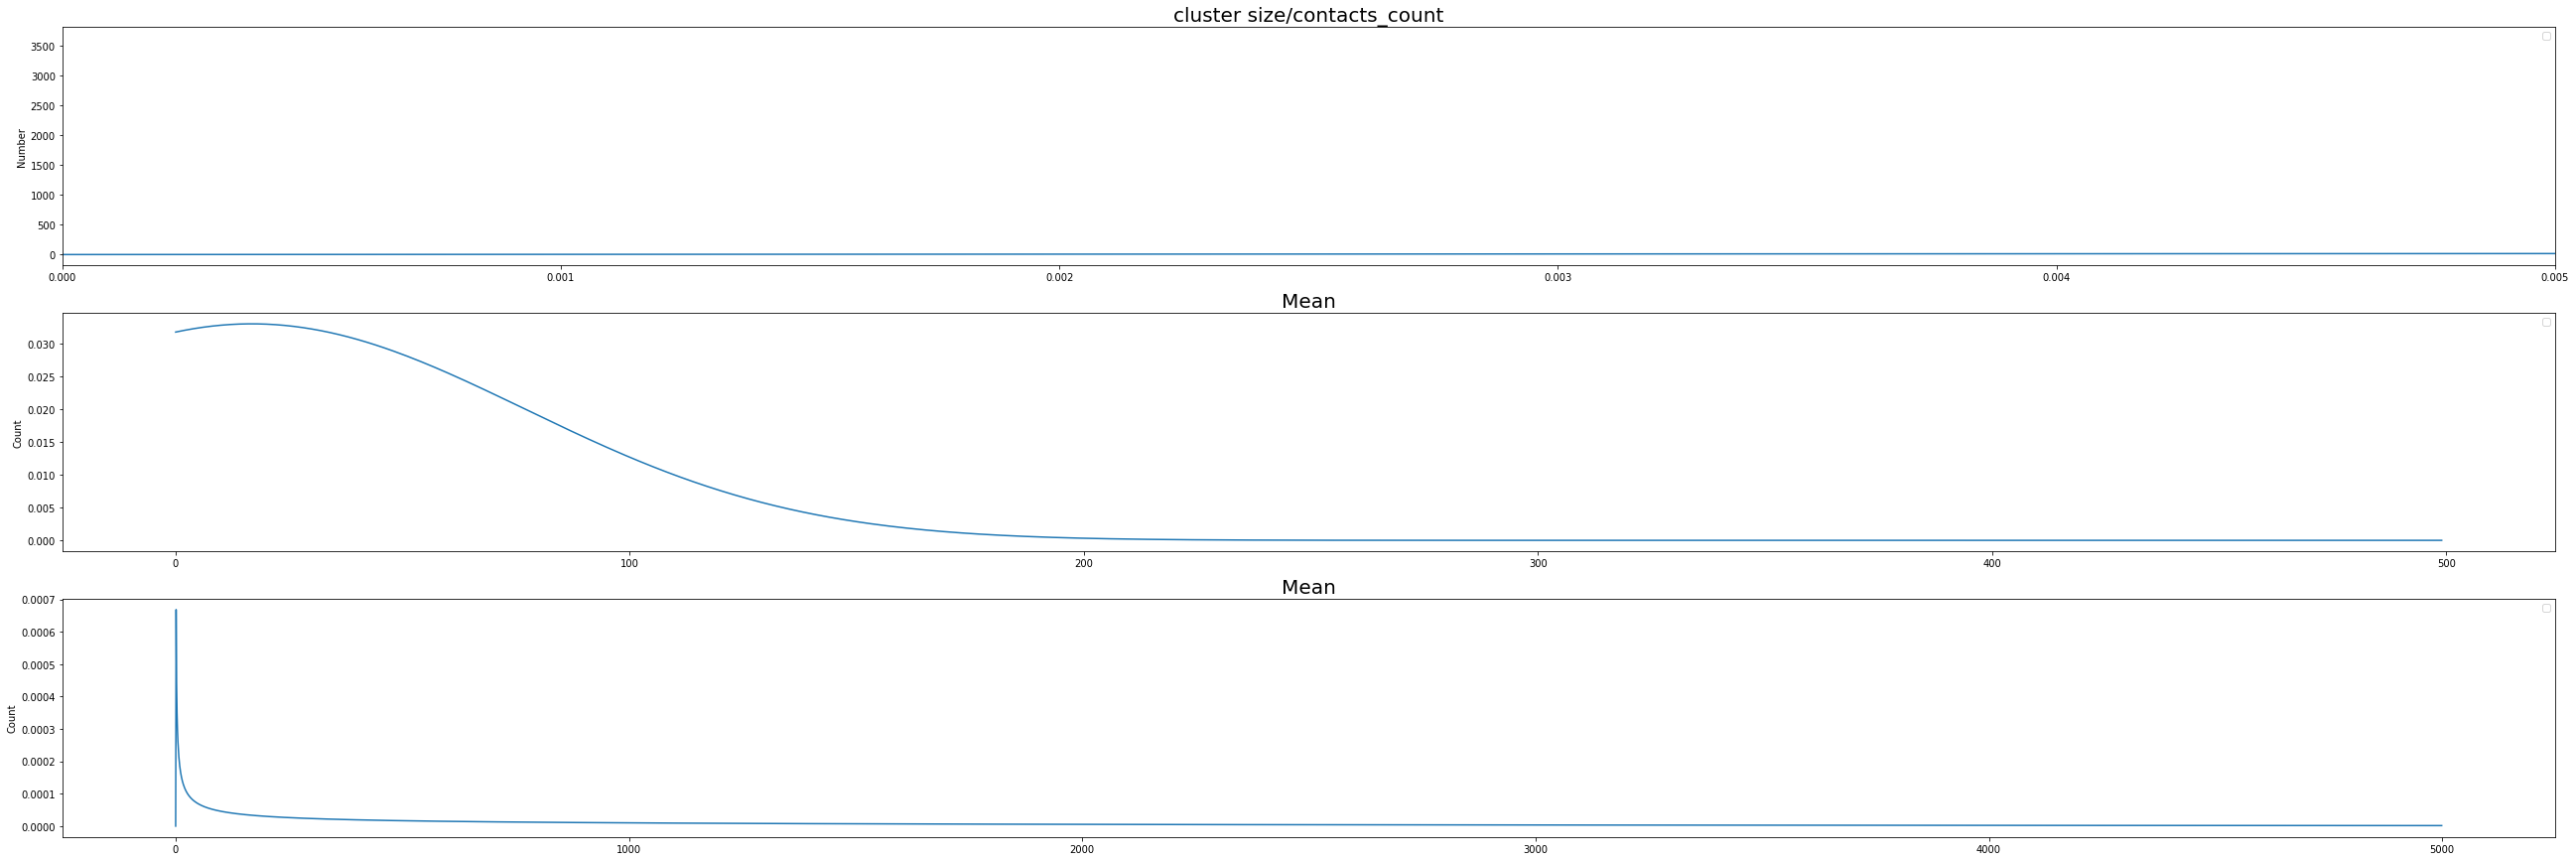

In [38]:
plt.rcParams['axes.titlesize'] = 8
fig = plt.figure(1, figsize=(45, 15))
gs = gridspec.GridSpec(3, 1)
ax0 = fig.add_subplot(gs[0, :])
x = np.linspace(0, 0.01, 500)
dna_cl_norm = ax0.plot(st.lognorm.pdf(x, *dnaclusnorm['lognorm']))
ax0.set_ylabel('Number')
ax0.set_title('cluster size/contacts_count', fontsize=20)
#ax0.set_xticks(np.arange(len(means.keys()))) 
#ax0.set_xticklabels(means.keys(), rotation=45,  ha="right", position=(0, 0))
ax0.set_xlim(0, 0.005)
#plt.ylim(0, 1)
ax0.legend()
ax1 = fig.add_subplot(gs[1, :])
x = np.linspace(0, 100, 500)
dna_cl_nnorm = ax1.plot(st.norm.pdf(x, *dnaclusnn['norm']))
ax1.set_ylabel('Count')
ax1.set_title('Mean', fontsize=20)
ax1.legend()
ax2 = fig.add_subplot(gs[2, :])
x = np.linspace(0, 100000, 5000)
nonspec = ax2.plot(st.gamma.pdf(x, *rnaclusnn['gamma']))
ax2.set_ylabel('Count')
ax2.set_title('Mean', fontsize=20)
#ax2.set_xticks(np.arange(len(means.keys())))
#ax2.set_xticklabels(means.keys(), rotation=45,  ha="right", position=(0, 0))
ax2.legend()



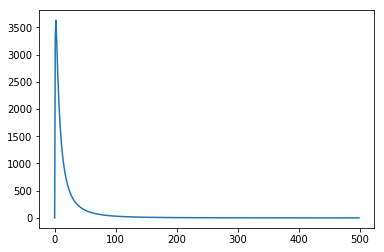

In [40]:
x = np.linspace(0, 0.01, 500)
plt.plot(st.lognorm.pdf(x, *dnaclusnorm['lognorm']))

Text(0.5, 1.0, 'Mean')

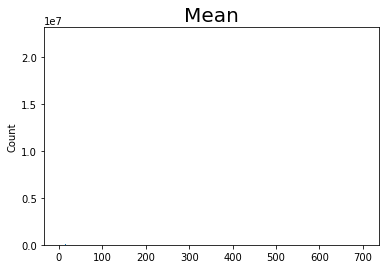

In [43]:
plt.hist(contacts['clus_count_dna'], bins = 10000)
plt.ylabel('Count')
plt.title('Mean', fontsize=20)
#ax1.set_xlim(0, 100)
#ax1.set_ylim(0, 0.5*10**7)

In [3]:
contacts

,contacts_count,rnaseq_count,cont,rnaseq,chP,zscore,pval,gene_name,ensg,rna_chr,...,id,gene_bgn,gene_end,gene_type,ac,clus_count_rna,dna_chr,dna_bgn,dna_end,clus_count_dna
0,5,94,1.588838e-07,0.000002,-2.637730,-2.634684,0.008422,A1BG,ENSG00000121410.12,chr19,...,D00795:28:C99BVACXX:7:1115:3795:65105,58345178,58353492,protein_coding,ENSG00000121410.12,11,chr9,96513328,96515352,1
1,5,94,1.588838e-07,0.000002,-2.637730,-2.634684,0.008422,A1BG,ENSG00000121410.12,chr19,...,D00795:28:C99BVACXX:7:1311:6744:54673,58345178,58353492,protein_coding,ENSG00000121410.12,11,chr2,85581894,85583916,1
2,5,94,1.588838e-07,0.000002,-2.637730,-2.634684,0.008422,A1BG,ENSG00000121410.12,chr19,...,D00795:30:CA2UTANXX:1:2308:3426:77358,58345178,58353492,protein_coding,ENSG00000121410.12,11,chr1,164236210,164238234,1
3,5,94,1.588838e-07,0.000002,-2.637730,-2.634684,0.008422,A1BG,ENSG00000121410.12,chr19,...,D00795:30:CA2UTANXX:5:2311:18668:59502,58345178,58353492,protein_coding,ENSG00000121410.12,11,chr15,99989020,99991043,1
4,5,94,1.588838e-07,0.000002,-2.637730,-2.634684,0.008422,A1BG,ENSG00000121410.12,chr19,...,D00795:28:C99BVACXX:8:1105:20169:24453,58345178,58353492,protein_coding,ENSG00000121410.12,11,chr3,61449033,61451057,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34026444,13957,3629,3.696167e-04,0.000085,1.471207,1.078352,0.280877,ZZZ3,ENSG00000036549.13,chr1,...,D00795:30:CA2UTANXX:1:2109:11055:59991,77562416,77683419,protein_coding,ENSG00000036549.13,13167,chr15,56789154,56791177,2
34026445,13957,3629,3.696167e-04,0.000085,1.471207,1.078352,0.280877,ZZZ3,ENSG00000036549.13,chr1,...,D00795:30:CA2UTANXX:1:1109:13519:47225,77562416,77683419,protein_coding,ENSG00000036549.13,13167,chr1,184860952,184862976,3
34026446,13957,3629,3.696167e-04,0.000085,1.471207,1.078352,0.280877,ZZZ3,ENSG00000036549.13,chr1,...,D00795:30:CA2UTANXX:1:1206:4723:5787,77562416,77683419,protein_coding,ENSG00000036549.13,13167,chr4,46739386,46741410,1
34026447,13957,3629,3.696167e-04,0.000085,1.471207,1.078352,0.280877,ZZZ3,ENSG00000036549.13,chr1,...,D00795:30:CA2UTANXX:5:2105:8876:52015,77562416,77683419,protein_coding,ENSG00000036549.13,13167,chr1,62585489,62587513,2
